# Molecular dynamics analysis

This Jupyter notebook presents a molecular dynamics analysis of the ADP-ribose binding site in ADRP domain from SARS-CoV-2 (PDB ID: 6W02). We simulated ADRP domain without its ligand, APR, for 600 ns. Then, a total of 600 frames were extracted at regular intervals of 1 ns from the molecular dynamics’ trajectory.

Here, we show cavity detection and characterization on ADRP domain from SARS-CoV-2 (PDB ID: 6W02), our reference. Further, we performed a occurence of cavity points, that were detected in at least two frames, and we plotted all properties (volume, area, depth and hydropathy) throughout the simulation.

# Requirements

In [1]:
# Import required modules
import os
import toml
import zipfile
import numpy
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import pyKVFinder
import nglview

In [2]:
# Unzip required files
if not os.path.isdir('./data'):
    with zipfile.ZipFile('./data.zip', 'r') as zipped:
        zipped.extractall('./data')

In [3]:
# Get all frames of the molecular dynamics simulation
frames = [f for f in sorted(os.listdir('./data')) if f.endswith('.pdb')][:-2]
print(frames)

# Get ligand pdb
ligand = './data/APR.pdb'

# Get reference protein
reference = './data/reference.pdb'

['001.pdb', '002.pdb', '003.pdb', '004.pdb', '005.pdb', '006.pdb', '007.pdb', '008.pdb', '009.pdb', '010.pdb', '011.pdb', '012.pdb', '013.pdb', '014.pdb', '015.pdb', '016.pdb', '017.pdb', '018.pdb', '019.pdb', '020.pdb', '021.pdb', '022.pdb', '023.pdb', '024.pdb', '025.pdb', '026.pdb', '027.pdb', '028.pdb', '029.pdb', '030.pdb', '031.pdb', '032.pdb', '033.pdb', '034.pdb', '035.pdb', '036.pdb', '037.pdb', '038.pdb', '039.pdb', '040.pdb', '041.pdb', '042.pdb', '043.pdb', '044.pdb', '045.pdb', '046.pdb', '047.pdb', '048.pdb', '049.pdb', '050.pdb', '051.pdb', '052.pdb', '053.pdb', '054.pdb', '055.pdb', '056.pdb', '057.pdb', '058.pdb', '059.pdb', '060.pdb', '061.pdb', '062.pdb', '063.pdb', '064.pdb', '065.pdb', '066.pdb', '067.pdb', '068.pdb', '069.pdb', '070.pdb', '071.pdb', '072.pdb', '073.pdb', '074.pdb', '075.pdb', '076.pdb', '077.pdb', '078.pdb', '079.pdb', '080.pdb', '081.pdb', '082.pdb', '083.pdb', '084.pdb', '085.pdb', '086.pdb', '087.pdb', '088.pdb', '089.pdb', '090.pdb', '091.pdb'

In [4]:
# Define a common custom box using parKVFinder's PyMOL plugin
box = {
    'box':{
        'p1': [ 2.03, -3.97, 7.72,],
        'p2': [ 18.93, -3.97, 7.72,],
        'p3': [ 2.03, 16.23, 7.72,],
        'p4': [ 2.03, -3.97, 33.72,],
    }
}

# Write common custom box to file
with open('box.toml', 'w') as f:
    toml.dump(box, f)

# Cavity detection and characterization on reference

In [5]:
# Detect and characterize cavities on reference
results = pyKVFinder.run_workflow(reference, probe_out=12.0, volume_cutoff=50.0, box='./box.toml', include_depth=True, include_hydropathy=True, ignore_backbone=True)

# Export cavities and results
results.export_all(fn='./results/6W02/6W02.results.toml', output='./results/6W02/6W02.output.pdb', include_frequencies_pdf=True, pdf='./results/6W02/6W02.histograms.pdf')

In [6]:
# Visualize depth of cavity points (rainbow scale)

# Create NGL Viewer widget
view = nglview.NGLWidget()

# Disply referece 6W02 as grey cartoon
pdb = view.add_component(reference)
pdb.clear()
pdb.add_cartoon(color='grey', opacity=0.5)

# Display ligand
lig = view.add_component(ligand)
lig.clear()
lig.add_licorice(color='red')

# Display cavities colored by depth
cavs = view.add_component('./results/6W02/6W02.output.pdb')
cavs.clear()
cavs.add_surface(colorScheme='bfactor', colorScale='rainbow', colorReverse=True, surfaceType='vws', probeRadius=0.3, opacity=0.8)

# Display on NGL viewer
view

NGLWidget()

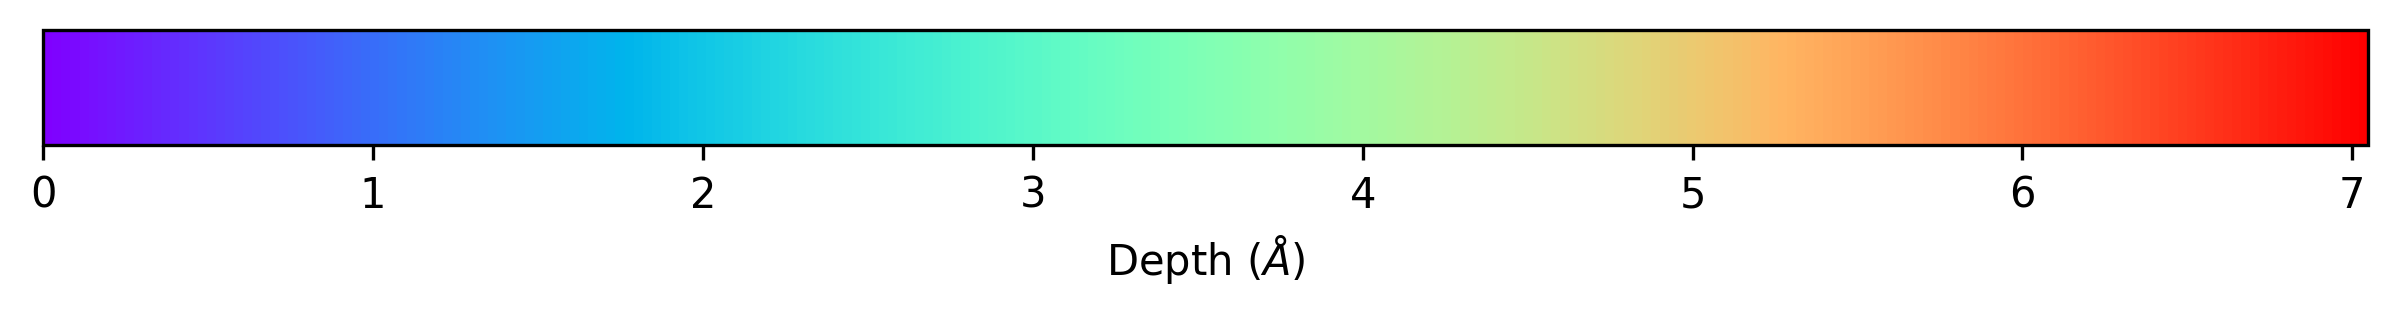

In [7]:
# Plot depth scale
fig, ax = plt.subplots(figsize=(10, 0.5), dpi=300)data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAACV4AAAE8CAYAAAAy1DgOAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjcuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/bCgiHAAAACXBIWXMAAC4jAAAuIwF4pT92AABD00lEQVR4nO3deZhU1bk37Ke7mWUUBERGJTKoOKDmiKJwxJkYE8X5VYxTYk6iRtREE3GIcYwaE/OeOIPjG1ExTklEwSBGVFTQICgIKIgRlFGmhq7vDz8rVjfQe0PRVd3e93VxXb1Wrb32s/euKqDrV3uVZDKZTAAAAAAAAAAAAJBYaaELAAAAAAAAAAAAqG0ErwAAAAAAAAAAAFISvAIAAAAAAAAAAEhJ8AoAAAAAAAAAACAlwSsAAAAAAAAAAICUBK8AAAAAAAAAAABSErwCAAAAAAAAAABISfAKAAAAAAAAAAAgJcErAAAAAAAAAACAlASvAAAAAAAAAAAAUhK8AgAAAAAAAAAASEnwCgAAAAAAAAAAICXBKwAAAAAAAAAAgJQErwAAAAAAAAAAAFISvAIAAAAAAAAAAEhJ8AoAAAAAAAAAACAlwSsAAAAAAAAAAICUBK8AAAAAAAAAAABSErwCAAAAAAAAAABISfAKAAAAAAAAAAAgJcErAAAAAAAAAACAlASvAAAAAAAAAAAAUhK8AgAAAAAAAAAASEnwCgAAAAAAAAAAICXBKwAAAAAAAAAAgJQErwAAAAAAAAAAAFISvAIAAAAAAAAAAEipXqELSGLVqlUxc+bMQpcBAAAAAAAAAAAUqR122CEaNWpUY/urFcGrmTNnxs4771zoMgAAAAAAAAAAgCL1zjvvxE477VRj+7PUIAAAAAAAAAAAQEqCVwAAAAAAAAAAACnViqUGKzs+RsfW0X29j1UkiJJlEoypKEtWS5JxmQRjktSdaF95mifReSzL5GdfNXhcEUmPLck8+Tn+ortmNfpcrL6eiHxesyRjqq+pJl/T+XtPS3BcCeZZl/B1lklyHhNdjwRj8nRsiV7TNVpP9WMSXbOEEev8XbM8vTeWJJknwZiS6veVt9d9gn0lu2bJ3hsjwbiSBPsrTXCuSxPMU5KgntJEY6rfV2mCc52knnydn7IEY5J+3SHJOUqyv0THluS6RpJ9Jag5ybVPcF0jT9cj0bEnua4RUZKg7mSvsyTnKMH1SHDN8vU6S1JPkmtWmqDmZM/7/F2zRPtLcq6TvIaS7CtPNSd6neXreuTp/EQkO0dJ3mYTvRbzdM2SzJOv13S+znW+zs+XNVUvUU35ep0lGlO90qjISz2lmXwdV/WS1VP9cX25vwQ1JTi2JP+tTDJPvo4t2WuoeslqTlBPknOYYMyXc1U/Jsk5ytvrLMk5SjKmIl+vsyTXo9ohyfaV8JpFRb7eZ6rfVWmSfeXp2BJd+wTXNck8JQme00leQ0nqiYgoSfJ8THLNElyPkgRv10mOP9G5TjAm0XlMcs2SPBfz9LqPiIgkcyU5/kTXrObe95K8fyQ59gRvjRFJ/u2wLsm+EoxJel3XJagpyVz5qjtv16PI6snX+YkovpqKrZ4kz+l8PT+S7CufcyXZXZLrkehcJ5mn+iE1W08eX2f5eh4V2/O6Js91vsYkqSfxXDV5rvP0GqqB97QZEXFUglK2lFoZvNo6ukfbWP96jMk+YM3PmIj8BYtq55jqn/wVCZ5hNVlzfveX4Phr4zUrsnryu78kY2ryHFW/ryRBp3wFr5LUnDh4VYMhv3VJgk41GKZMVE++rlmSD87zGJZLFhbM1/M6wS/mEpyjJOGTJL+RTvIcSjJPkmuW5LgiEp6jvAWmEsyToO5EoaJEgaEkx56f46rJIFTi/dVgyC1RuKAGg1eJQl41GHL6sqbqxyQK8OUreJW3fVU7JG/15CvgmOS6Jq0p0f7yFazJU2AqWfAqPx+c52tf+Q1e1dx1TfQcylvQKV+hkZo7P0lrSnSOiiycla/gVaIPqmvy/OQxeJXkw+NE174Gg1f5CsvlK3iV6Bwm/BA6WWgmT+GbvAWvEoRm8hVkyNex5zF4lSiAkqf9JQmN5C8Il6cwUKJ68hW8SvbemLcgYJ7CR3kLMSUKXuVrXzVXc0T+zlFZgg8Qa/L4a/TD/JoMINR4uMA8mz1PkmsfkcdQRJEFYvJVT41eszwGQmry+OvsPHl8ndXK4y+y87g2XzUn+jZksm9QJDm2JLtL+jyqTpL/62SS3Lkg0c6SDCoISw0CAAAAAAAAAACkJHgFAAAAAAAAAACQkuAVAAAAAAAAAABASoJXAAAAAAAAAAAAKQleAQAAAAAAAAAApCR4BQAAAAAAAAAAkJLgFQAAAAAAAAAAQEqCVwAAAAAAAAAAACkJXgEAAAAAAAAAAKQkeAUAAAAAAAAAAJCS4BUAAAAAAAAAAEBKglcAAAAAAAAAAAApCV4BAAAAAAAAAACkJHgFAAAAAAAAAACQkuAVAAAAAAAAAABASoJXAAAAAAAAAAAAKQleAQAAAAAAAAAApCR4BQAAAAAAAAAAkJLgFQAAAAAAAAAAQEqCVwAAAAAAAAAAACkJXgEAAAAAAAAAAKQkeAUAAAAAAAAAAJCS4BUAAAAAAAAAAEBKglcAAAAAAAAAAAApCV4BAAAAAAAAAACkJHgFAAAAAAAAAACQkuAVAAAAAAAAAABASoJXAAAAAAAAAAAAKQleAQAAAAAAAAAApCR4BQAAAAAAAAAAkJLgFQAAAAAAAAAAQEqCVwAAAAAAAAAAACkJXgEAAAAAAAAAAKQkeAUAAAAAAAAAAJCS4BUAAAAAAAAAAEBKglcAAAAAAAAAAAApCV4BAAAAAAAAAACkJHgFAAAAAAAAAACQkuAVAAAAAAAAAABASoJXAAAAAAAAAAAAKQleAQAAAAAAAAAApCR4BQAAAAAAAAAAkJLgFQAAAAAAAAAAQEqCVwAAAAAAAAAAACkJXgEAAAAAAAAAAKQkeAUAAAAAAAAAAJCS4BUAAAAAAAAAAEBKglcAAAAAAAAAAAApCV4BAAAAAAAAAACkJHgFAAAAAAAAAACQkuAVAAAAAAAAAABASoJXAAAAAAAAAAAAKQleAQAAAAAAAAAApCR4BQAAAAAAAAAAkJLgFQAAAAAAAAAAQEqCVwAAAAAAAAAAACkJXgEAAAAAAAAAAKQkeAUAAAAAAAAAAJCS4BUAAAAAAAAAAEBKglcAAAAAAAAAAAApCV4BAAAAAAAAAACkJHgFAAAAAAAAAACQkuAVAAAAAAAAAABASoJXAAAAAAAAAAAAKQleAQAAAAAAAAAApCR4BQAAAAAAAAAAkJLgFQAAAAAAAAAAQEqCVwAAAAAAAAAAACkJXgEAAAAAAAAAAKQkeAUAAAAAAAAAAJCS4BUAAAAAAAAAAEBKglcAAAAAAAAAAAApCV4BAAAAAAAAAACkJHgFAAAAAAAAAACQkuAVAAAAAAAAAABASoJXAAAAAAAAAAAAKQleAQAAAAAAAAAApCR4BQAAAAAAAAAAkJLgFQAAAAAAAAAAQEqCVwAAAAAAAAAAACkJXgEAAAAAAAAAAKQkeAUAAAAAAAAAAJCS4BUAAAAAAAAAAEBKglcAAAAAAAAAAAApCV4BAAAAAAAAAACkJHgFAAAAAAAAAACQkuAVAAAAAAAAAABASoJXAAAAAAAAAAAAKQleAQAAAAAAAAAApCR4BQAAAAAAAAAAkJLgFQAAAAAAAAAAQEqCVwAAAAAAAAAAACkJXgEAAAAAAAAAAKQkeAUAAAAAAAAAAJCS4BUAAAAAAAAAAEBKglcAAAAAAAAAAAApCV4BAAAAAAAAAACkJHgFAAAAAAAAAACQkuAVAAAAAAAAAABASoJXAAAAAAAAAAAAKQleAQAAAAAAAAAApCR4BQAAAAAAAAAAkJLgFQAAAAAAAAAAQEqCVwAAAAAAAAAAACkJXgEAAAAAAAAAAKQkeAUAAAAAAAAAAJCS4BUAAAAAAAAAAEBKglcAAAAAAAAAAAApCV4BAAAAAAAAAACkVK/QBWyKz2PGBh+ryFS/faai+jEVJclqqViXYH9J5kkwKG/HlmRMkuMqq76gJPNUlCXYV4KIYJJ5IiIqEsyVSTBXRWmC46/BY0t2XAlqzlM9yY4ryasjn9csyZjqa8rbvvJ1XfN0rpPMsy7h6yyT5Dwmuh4JxuTp2BK9pmu0nurHJLpmCSPW+btmeXpvLEkyT4IxCf4+z9vrPsG+kpzDJNciIiLydM0SnesE85QkqTvRmOqHZBKc6yT1JDmu0gTnJ8k5TPp1h9IkdSfYX0mSY0tyXRP8SzbJuS5LMKY0yb+/Exx7WYIxiY49yXWNiJIEdSd5HiW59knmSXLNkhx/kuuRpJ4k16w0Qc1Jrmui96FIds0S7S/JuU7yGkqyrzzVnOh1lq/rkafzE5HsHCV5m030WszTNUsyT75e0/k61/k6P1/WVL1ENeXrdZZoTPVKo/pfqCSqOZOv46pesnoS/KIoEp7HBMeW5L+VSebJ17Elew1VL1nNCepJcg4TjPlyrurHJDlHeXudJTlHScYk+CVpstdZkutR7ZBk+0p4zZL84jbZc7/6XZUm2Veeji3RtU9wXZPMU5LgOZ3kNZSknoiIkiTPxyTXLMH1KEnwdp3k+BOd6wRjEp3HJNcsyXMxT6/7iEj0QUuS/ZUlumY1976X7IOfJPNUPyTRB1Hr8vWhV8Lrui5BTUnmylfdebseRVZPvs5PRPHVVGz1JHlO5+v5kWRf+Zwrye6SXI9E5zrJPNUPqdl68vg6y9fzqNie1zV5rvM1Jkk9ieeqyXOdr9d0Hv/O34ANJ4hqRq0MXj0cR234wUQXNsGYtQmLAQAoUkn+mZrk/5VJxgAAAAAAAMA3Ta1YavCzzz4rdAkAAAAAAAAAAABZtSJ4tWjRokKXAAAAAAAAAAAAkFUrlhrs1KlTTnv06NHRvXv3AlUDUHxmzJgRRx11VLbtfRIgl/dJgI3zPgmwcd4nATbO+yTAhnmPBNi4fL9P7rDDDnmoKrlaEbxq2LBhTrt79+6x0047FagagOLnfRJg47xPAmyc90mAjfM+CbBx3icBNsx7JMDG1bb3yVqx1CAAAAAAAAAAAEAxEbwCAAAAAAAAAABISfAKAAAAAAAAAAAgJcErAAAAAAAAAACAlASvAAAAAAAAAAAAUhK8AgAAAAAAAAAASEnwCgAAAAAAAAAAICXBKwAAAAAAAAAAgJQErwAAAAAAAAAAAFISvAIAAAAAAAAAAEhJ8AoAAAAAAAAAACCleoUuIIltttkmhg8fntMG4D+8TwJsnPdJgI3zPgmwcd4nATbO+yTAhnmPBNi42v4+WZLJZDKFLgIAAAAAAAAAAKA2sdQgAAAAAAAAAABASoJXAAAAAAAAAAAAKQleAQAAAAAAAAAApCR4BQAAAAAAAAAAkJLgFQAAAAAAAAAAQEqCVwAAAAAAAAAAACkJXgEAAAAAAAAAAKQkeAUAAAAAAAAAAJCS4BUAAAAAAAAAAEBKglcAAAAAAAAAAAApCV4BAAAAAAAAAACkJHgFAAAAAAAAAACQkuAVAAAAAAAAAABASvUKXUASM2fOjFdffTXmzp0ba9asiVatWkXPnj2jX79+0ahRo0KXBwAAALXKmjVrYtq0aTF79uyYN29eLFu2LMrLy6N58+bRunXr6NOnT/Tq1SvKysoKXSoAAADUCdOnT4/JkyfH3LlzY8WKFdG4ceNo165d7LjjjrHrrrtGw4YNC10iAJugqINXo0ePjquuuireeOON9T7etGnTGDp0aAwfPjzatGlTw9UBAFCsMplMzJ49O95+++2YO3duLF68OBo2bBitWrWKb33rW7HXXnsJ8APfOKNGjYoxY8bEhAkTYtq0abF27dqNjm/RokWccMIJce6550bPnj1rqEoAAACoO5YtWxa///3v484774xZs2ZtcFyDBg1i7733jmOOOSbOPffcGqwQgM1VkslkMoUuorLVq1fH6aefHg888ECi8dtss02MGjUq9t9//y1cGUBxmDdvXrz66qsxceLEePXVV+P111+PZcuWZR/v0qVLzJ49u3AFAhTAokWLYvTo0fHXv/41XnjhhVi4cOEGx9avXz+OOOKIOO+88+KAAw6owSoBCqdjx44xb9681NvVr18/Lrnkkhg+fHiUlJRsgcoAapcTTjghHn744Zw+/w8Hvgkuv/zyuOKKKzZ5+1NPPTXuvffe/BUEUOSeeuqpOOOMM+Lf//534m3atWsXn3zyyRasCqDmDR06NEaMGJGXuYrx/99Fd8erioqKOO644+KJJ57I6S8rK4vOnTtHixYtYtasWbFkyZLsYwsWLIjDDjssxowZE/vss09NlwxQIyZMmBC//e1vY+LEifHxxx8XuhyAovLjH/847rzzzlizZk2i8eXl5TF69OgYPXp0nHLKKfH73/8+mjdvvoWrBCg+jRo1yv5fu6KiIhYuXBgffvhhfP07WuXl5XHFFVfERx99FHfddVcBqwUovCeffLJK6AoAACq7+eab44ILLojK90Bp1KhRdOjQIdq0aRMrV66M+fPnb/QLpADkatCgQaFLqKK00AVUdsMNN1QJXf3whz+MDz/8MD744IN488034/PPP4/HHnssOnfunB2zYsWKOPbYY3MCWQB1yWuvvRaPP/640BXAekycOHG9oauysrLo2LFj9O3bN/r06RMtWrSoMmbkyJFx0EEHxfLly2uiVICC6tChQ5x55plx3333xYwZM+KLL76I6dOnZ++iOnv27Pjss8/i9ttvj44dO+Zse/fdd8c999xToMoBCm/JkiXxox/9qNBlAABQ5O6666742c9+lhO6Ouyww+LZZ5+NxYsXx8yZM2PixIkxZcqUWLBgQcybNy/uu+++OProo4syUABQTAYPHlzoEqooqqUGP/vss+jWrVvOclnXXHNN/PznP1/v+Hnz5sV+++2Xcxuxyy67bLNudQtQrG655ZY4//zz1/tY06ZNcwIDxXiLRYAtac8994xJkyZFRETLli3jxBNPjCOOOCL69+8fzZo1y45bt25djB8/Pi677LIYP358zhxHH310jBo1qkbrBqhJU6ZMiV122SXxcoGLFi2KQYMGxRtvvJHt23bbbWPu3LlRWlp03+MC2OLOOuusuOOOOyIiYquttoovvvgi+5j/hwPfBJWXGrzxxhtj1113Tbx9hw4donfv3luiNICiMWPGjNhll11i1apVERFRv379GDFiRJxwwgmJtl+0aFG0atVqS5YIUOOmTp26STcXef/99+Occ87J6Zs8eXL06dMnX6XlRVEtNXj99dfnhK7233//uPjiizc4frvttos777wzBg0alO27+eab46c//Wm0bt16i9YKUCjNmjWLvn37xl577RV777137LXXXjFr1qwYOHBgoUsDKKiuXbvGL3/5yzjxxBOjcePG6x1TVlYWAwYMiLFjx8Y555wTt99+e/axRx99NMaOHev9FKiz0v5ColWrVnH//ffHTjvtlP2W7vz582PChAnRv3//LVEiQNEaN25c3HnnnRERUVpaGsOHD4+LLrqowFUBFFbfvn1jwIABhS4DoKicddZZ2dBVRMQDDzwQQ4YMSby90BVQF/Xu3XuTAvgvvPBCTnv33XcvutBVRBEtNVhRUVFlyYLLL7+82m/iHnjggTm/8F22bFn8+c9/3iI1AhTSd77znfjXv/4VixcvjrFjx8b1118fxxxzTHTp0qXQpQEU3BVXXBHTp0+P008/fYOhq68rKyuLP/7xj7Hnnnvm9H/1YRoAX+rVq1f07ds3p+/dd98tUDUAhbFy5co444wzsiHUn/zkJ7HXXnsVuCoAAIrNE088EWPHjs22hwwZkip0BcB/VFRUxH333ZfTN3To0MIUU42iCV69/PLLsWDBgmx7++23T/xNidNPPz2nPXr06DxWBlAcdthhh+jdu7dlXQDW44gjjogGDRqk2qasrKzKXQr+9re/5bMsgDphhx12yGkvXLiwQJUAFMavfvWrmDlzZkREdO7cOX79618XuCIAAIrR1++uHxExfPjwAlUCUPuNGTMm5s6dm23Xr18/TjzxxAJWtGFF8+n9008/ndM+6KCDqr3b1dfHft24cePiiy++yFttAADUTZWXyvrss89ixYoVBaoGoDh9fYmEiIiWLVsWphCAAnjttdfilltuybZvu+22aNq0aeEKAgCgKM2bNy/nS5277bZb7LTTTgWsCKB2GzFiRE578ODB0aZNmwJVs3FFE7x66623ctr9+vVLvG2HDh2ia9eu2faaNWti6tSpeaoMAIC6qlWrVlX6lixZUoBKAIpTJpOJ1157Laev8tKDAHVVeXl5nH766bFu3bqI+HKpmMGDBxe4KgAAitFf//rX7L8bIyIGDhxYwGoAarelS5fG448/ntNXrMsMRhRR8Ordd9/Naffu3TvV9pXHV54PAAAqmzdvXpW+1q1bF6ASgOJ09913x8cff5xt9+zZM/bee+8CVgRQc6655pp4++23I+LLu/3deuutBa4IAIBiVflLS7vuumv25zfffDN++tOfxq677hqtWrWKJk2aRNeuXeOggw6KG2+8cb2/owT4Jvvzn/8cK1euzLbbtm0bhx9+eAEr2rh6hS4gImLlypXx4Ycf5vR16tQp1RyVx0+fPn2z6wIAoG4bP358TrtLly7RoEGDAlUDUFxGjBgR55xzTrZdWloaf/jDH6KkpKSAVQHUjKlTp8bVV1+dbV933XXRvn37AlYEUJxWr14dH3zwQXz22WdRv379aN26dXTo0CGaNGlS6NIAalTl4NX2228fy5cvj3PPPTfuvvvuKuPnzJkTc+bMiTFjxsRll10W5513XlxxxRVRv379mioZoGjde++9Oe2TTjop6tUrinjTehVFZQsXLoxMJpNt169fP9q2bZtqju222y6n/emnn+alNgAA6q7Kv/Qo5m9MAOTbe++9l/MlqPLy8li0aFG888478cQTT8TUqVOzjzVo0CBuv/32OPDAAwtRKkCNqqioiNNPPz3WrFkTERH9+/ePM888s8BVARSfH//4x/HBBx/EqlWrcvrr1asXffv2jcMOOyzOOeec2GabbQpUIUDNmTFjRk67tLQ09t9//3jzzTer3XblypVxzTXXxGuvvRaPPfZYNGvWbEuVCVD0ZsyYERMmTMjpO+200wpUTTJFEbxavnx5TrtJkyapv0G71VZbbXROAAD4umeeeSb+8Y9/5PQV8xrhAPn2xz/+MX73u99tdExJSUkceuihcc011+QskwBQl916663xyiuvRMR/gqfu9gdQ1deD+l+3du3amDhxYkycODGuu+66GDZsWAwfPjzKyspquEKAmlFRURHLli3L6fvpT3+aDV2VlJTE4MGD4/DDD4+OHTvGF198EW+++Wbcd9998fHHH2e3GTNmTAwdOjQeffTRGq0foJiMGDEip73HHnvELrvsUqBqkiktdAERVUNSjRo1Sj1H48aNNzonAAB85fPPP4+zzz47p++oo46Kvffeu0AVARSnIUOGxKWXXip0BXxjzJo1K375y19m27/4xS+iZ8+eBawIoHZbuXJlXHXVVTFo0CCf2wB11pIlS3JWd4qIeOONNyIionXr1vHiiy/GX/7yl/jhD38YgwcPjuOOOy6uvfbamD59epx44ok52z322GMxcuTIGqsdoJhkMpkq74G14QvzRRG8qnwb2gYNGqSeo2HDhjntlStXblZNAADUTRUVFXHyySfH3Llzs30tWrSIW2+9tYBVARSnP//5z7HffvvF/vvvX2XZBIC66KyzzoovvvgiIiJ69uwZl1xySYErAiguJSUl0a9fv7j66qvjueeei7lz58aKFSti1apVMW/evHjyySfj7LPPrvIF+3HjxsXxxx8f69atK1DlAFvOhoKlZWVl8fTTT0f//v3X+3jTpk3jvvvui4MPPjin/ze/+U2VIBfAN8ELL7wQH374YbbdoEGDKgHVYlQUwavK/wBfs2ZN6jlWr1690TkBACAi4sILL4xnn302p+9Pf/pTdOrUqUAVARTGLbfcEplMJvtnxYoV8dFHH8VTTz0Vp59+es6dpcePHx977bVXvP766wWsGGDLuuuuu2LMmDER8WWw4Pbbb9+kL4gC1FUHH3xwTJs2LSZMmBCXXHJJDBo0KLbbbrto3LhxNGzYMDp06BCDBw+O//3f/433338/9t1335ztn3766fjjH/9YoOoBtpwNfS59xhlnxLe//e2NbltaWhr/9//+3ygt/c/H9tOnT48XX3wxrzUC1AaVlxkcPHhwtG7dukDVJFcUwaumTZvmtCvfASuJyne4qjwnAADceuutcdNNN+X0XXTRRXHccccVqCKA4tG4cePo2LFjHHHEEXHnnXfGlClTYrfddss+vnjx4jjqqKNi8eLFBasRYEuZP39+DBs2LNs+44wzNnhnAoBvqn79+sWOO+6YaGzHjh1jzJgxsc8+++T0//rXv44VK1ZsifIACmZDn0ufeeaZibbffvvtY9CgQTl9glfAN83y5cvjsccey+mrDcsMRhRp8GrFihWpb5/41S3ANzQnAADfbA8++GCcd955OX1Dhw6Na6+9tjAFARS57t27x3PPPZdzR8B58+bFDTfcUMCqALaMH//4x9lgafv27eP6668vbEEAdUCjRo1i5MiRUa9evWzfp59+Gn//+98LWBVA/jVu3DjKyspy+po1axa777574jkOOOCAnLY7TgPfNI888khO7qddu3Zx2GGHFbCi5IoieNWmTZsoKSnJtsvLy+PTTz9NNce8efNy2m3bts1LbQAA1H5PPfVUnHrqqTnh/u9///tx55135vw7FIBcbdq0iSuuuCKn79577y1MMQBbyCOPPBKPP/54tv273/0uWrZsWbiCAOqQ7t27x5FHHpnTJ3gF1EWVP5vu3r17zvKB1enRo0dOO+1n5QC1XeXfOZ500kk5Af5iVhTBq8aNG0fnzp1z+j788MNUc1Qe37Nnz82uCwCA2m/s2LExZMiQWLt2bbbvoIMOioceeqjKN9EAqOp73/teTkj1448/jjlz5hSwIoD8uvDCC7M/H3HEEXHssccWsBqAuufAAw/MaU+fPr1AlQBsOb169cppN2/ePNX2lccvWrRos2sCqC0++OCDGD9+fE5fbVlmMKJIglcRVYNSU6dOTbX9u+++u9H5AAD45pk4cWIceeSRsWrVqmxfv3794vHHH48GDRoUsDKA2qNly5ax9dZb5/R98sknBaoGIP++WmIwIuLpp5+OkpKSav8MHDgwZ445c+ZUGfPWW2/V7IEAFKmvL10dEbFgwYICVQKw5fTu3TunvXr16lTbf/33lxERTZo02eyaAGqLkSNH5qxYsscee8Quu+xSwIrSKZrg1W677ZbTfvnllxNvO3/+/Jg9e3a2Xb9+/Sp/uQEA8M0yZcqUOOyww2L58uXZvt133z2eeeaZ2GqrrQpYGUDtV79+/UKXAABALVH5347l5eUFqgRgy9ljjz1y2v/+979TbV95acHWrVtvdk0AtUEmk4mRI0fm9J122mkFqmbTFE3wavDgwTntMWPG5CTaNqbyeuADBw6Mpk2b5q02AABql+nTp8dBBx2Uc0vuXr16xd/+9rdo0aJFASsDqH2WLVsWn3/+eU5fu3btClQNAAC1TeW7pW6zzTYFqgRgyzniiCOitPQ/H73PmjWryv+lN2bSpEk57R49euStNoBi9uKLL8asWbOy7QYNGsSJJ55YwIrSq1foAr7Sr1+/aNOmTSxcuDAivlzDcdy4cVVu270+d911V077u9/97hapEQCA4jdnzpwYNGhQzrfEunXrFs8995xf7gJsgqeffjrni1HbbLNNbLvttgWsCCC/nnjiidR3X5k8eXIMGzYs227Xrl3cf//9OWO6d++el/oAaruXXnopp1156UGAuqBt27ax7777xvjx47N9jz32WJxxxhnVbrt27dp4/PHHc/oGDBiQ7xIBitKIESNy2t/5zndi6623LlA1m6ZoglelpaUxdOjQuPHGG7N9V1xxRQwYMCBKSko2uN3zzz+f8xdYs2bN4thjj92itQIAUJzmz58fBx54YMydOzfbt91228Xzzz8f2223XQErA6idVq5cGcOHD8/pGzx4cM63eAFquwMOOCD1NvXq5f5atVGjRjFo0KB8lQRQZyxevDgeffTRnL4DDzywQNUAbFlnn312zufWN9xwQ/yf//N/omHDhhvd7o477si5O2Dz5s3jkEMO2WJ1AhSLL774IkaNGpXTN3To0MIUsxmK6jelF198cc4SgS+++GJcd911Gxw/b968Kinhc889N9q0abPFagQAoDh9/vnncdBBB8XMmTOzfdtss00899xz0a1btwJWBlB4F110Ubz22muptvn888/jyCOPjPfeey/bV1ZWFueff36+ywMAoI4aNmxYLF68ONtu0KBBHHbYYYUrCGALOuGEE2KXXXbJtt977704++yzo6KiYoPbTJw4MS666KKcvnPOOSdatGixxeoEKBaPPvpoLF++PNtu3759HHrooQWsaNMUVfCqTZs2cckll+T0/eIXv4hzzjknPv7442xfRUVFjB49Ovr16xezZ8/O9nfo0CEuuOCCmioXAIAisWzZsjj00EPjX//6V7avZcuW8fe//z169epVwMoAisPf//732HvvvePb3/523HTTTfHWW2+td1mtTCYT06ZNi6uuuip69OgRY8aMyXn8/PPPz/klMgAA3wzXXnttTJo0KfH4tWvXxgUXXBB33XVXTv8Pf/hDy1YDdVZpaWncfPPNOas5jRgxIg455JAq76FLliyJm266KQYNGpQTOthxxx2rfF4OUFfde++9Oe2TTjqpyh2ma4OSTCaTKXQRX1dRURHf/e5346mnnsrpLysriy5dukSLFi1i1qxZOd+QiIho3LhxPPfcc7HvvvvWYLUANWvChAmxcuXKKv2TJ0+OYcOGZdvt2rWL+++/f71zdOjQIXr37r3FagQohIEDB8a4ceNy+q688srYZ599Us/Vt2/faNWqVZ4qAygOu+22W0yePDmnr0GDBrHddttFy5Yto0GDBrFs2bL46KOPYtmyZeud49RTT427777bMoMAETFu3LgYOHBgtt2lS5ecL4gC1DUDBgyIF198Mfr16xfHHntsHHjggdGzZ88qH4wtWbIknnnmmbj++uvjrbfeynlshx12iIkTJ0br1q1rsHKAmnfdddfFz3/+8yr97du3j44dO8YXX3wRM2fOjDVr1uQ83rp16xg7dqwvPAHfCHPmzIlu3brF1yNLb7/9duy8884FrGrTFF3wKiJi1apVcdppp8XDDz+caHzr1q1j1KhRMWDAgC1bGECBde3aNebMmbNZc5x66qlV0sMAtd3Xv0W2ucaOHevflUCds77gVVLNmzePa6+9Nn74wx/m9f0WoDYTvAK+ab4KXn1dw4YNo2PHjtGiRYsoKyuLzz77LGbPnr3eJbXat28f//jHP+Jb3/pWTZUMUFC///3v44ILLljv3abXp0ePHvHkk096nwS+Ma666qq47LLLsu2+ffvG66+/XsCKNl1Rfk21UaNG8dBDD8WoUaNit9122+C4rbbaKs4555yYOnWqD8cAAABgAx566KG47rrrYtCgQdG8efNqx5eUlESfPn3ihhtuiBkzZsSPfvQjoSsAAHKsXr06Zs6cGW+88Ua89tpr8cEHH6w3dHX44YfH5MmThQmAb5Sf/OQnMWXKlDjuuOOifv36GxzXrVu3+N3vfhdTpkzxPgl8o4wYMSKnPXTo0MIUkgdFvTji0UcfHUcffXTMmDEjJk6cGPPmzYs1a9ZEy5Yto1evXrHvvvtGo0aNCl0mAAAAFLVevXpFr1694qKLLoqKiop4//33Y8aMGfHhhx/G0qVLo7y8PJo1axYtWrSIrl27xh577JEooAUAwDfDpZdeGr169Yrx48fHtGnTYt26dRsd37Rp0zjssMPif/7nf2L//fevoSoBikvPnj3j4YcfjqVLl8bLL78c77//fixZsiSaNm0a7dq1iz322CN69OhR6DIBatxLL70UM2fOzLYbNGgQJ554YgEr2jxFudQgAAAAAAAAxWfFihUxderUmD17dsyfPz+WL18eFRUV0bJly2jVqlX07t07dtlllygrKyt0qQAAsMUJXgEAAAAAAAAAAKRUWugCAAAAAAAAAAAAahvBKwAAAAAAAAAAgJQErwAAAAAAAAAAAFISvAIAAAAAAAAAAEhJ8AoAAAAAAAAAACAlwSsAAAAAAAAAAICUBK8AAAAAAAAAAABSErwCAAAAAAAAAABISfAKAAAAAAAAAAAgJcErAAAAAAAAAACAlASvAAAAAAAAAAAAUhK8AgAAAAAAAAAASEnwCgAAAAAAAAAAICXBKwAAAAAAAAAAgJQErwAAAAAAAAAAAFISvAIAAAAAAAAAAEhJ8AoAAAAAAAAAACAlwSsAAAAAAAAAAICUBK8AAAAAAAAAAABSErwCAAAAAAAAAABISfAKAAAAAAAAAAAgJcErAAAAAAAAAACAlASvAAAAAAAAAAAAUhK8AgAAAAAAAAAASEnwCgAAAAAAAAAAICXBKwAAAACoYxYuXBgXXnhhdO/ePRo2bBjt27ePE044Id5+++1ClwYAAABQZ5RkMplMoYsAAAAAAPLjX//6VxxyyCExb968Ko/Vr18/7r777jj55JMLUBkAAABA3SJ4BQAAAAB1xPLly6NPnz4xa9asbF+HDh1iwYIFUV5eHhER9erVi3/84x+xzz77FKpMAAAAgDrBUoMAAAAAUEfcdttt2dDVoEGDYu7cuTFv3rxYsmRJXHjhhRERsXbt2vj5z39eyDIBAAAA6gR3vAIAAACAOmLfffeNl19+Odq1axfvvfdeNG/ePOfxo48+Oh577LEoKSmJBQsWROvWrQtUKQAAAEDt545XAAAAAFBHzJkzJyIiBgwYUCV0FRFxzDHHREREJpOJ2bNn12RpAAAAAHWO4BUAAAAA1BFbbbVVRESsWbNmvY+vXr06+3PTpk1rpCYAAACAukrwCgAAAIA6Ydy4cVFSUpL9c/nllxe6pETOPPPMbM1DhgzZrLl22223iIh4/vnnY968eTmPZTKZuPfeeyPiy4BWly5dNjrXww8/nK2rU6dOsWLFis2qDQAAAKCuEbwCAAAAgAJ5/fXX4+67746IiHr16sXVV1+9WfOdeeaZERGxdOnSOPjgg+OFF16I5cuXx9SpU2PIkCHx4osvRkTEySefHI0aNdroXMcdd1w2yDV37ty49tprN6s2AAAAgLpG8AoAAABgM3Tt2jXnLkvr+9OoUaNo0aJFbL/99tGvX7849dRT4/rrr48JEyZEeXl5oQ+BAjrvvPOioqIiIiJOOeWU2HHHHTdrvkGDBsWPfvSjiIiYOnVqHHjggdGsWbPYaaed4tFHH42IiO233z6uueaaaucqKSmJq666Ktu+4YYb4qOPPtqs+gAAAADqEsErAAAAgC1s9erVsXTp0pg1a1b885//jJEjR8bFF18c++23X7Rt2zZOP/30eOuttwpdZsHNnj07J7A2dOjQQpe0RT3zzDMxYcKEiPgy5HTRRRflZd7bbrstunfvvt7HBg4cGBMmTIhWrVolmuuII46InXfeOSIiVq1atdl35AIAAACoSwSvAAAAAApo8eLFcffdd8fuu+8eQ4YMiXnz5hW6JGrIZZddlv35yCOPjB49euRl3meeeSZmzJix3scOPfTQaN++feK5SkpKYtiwYdn23XffHbNnz97cEgEAAADqhHqFLgAAAACgLrnxxhtj1113zekrLy+PRYsWxeLFi2POnDnxz3/+M15//fVYuXJlzrhRo0bFuHHj4pFHHokBAwbUYNXUtDFjxsSkSZOy7a+WB9xc69atiwsvvHCDj0+ZMiX1nMcdd1ycf/75sWjRoigvL49bbrklbrnlls2oEgAAAKBuELwCAAAAyKO+ffsmCk2tXLky7rvvvrjlllvi3XffzfYvXLgwDj/88Hj22WfjgAMO2IKVUki/+93vsj936dIlDjrooLzMe/vtt+c8n/bbb7946aWXsu1NCV41atQoTjrppPjDH/4QERH33HNPXHXVVdGsWbPNLxgAAACgFrPUIAAAAEABNG7cOM4666yYMmVKnH/++TmPrVy5MoYMGRLz588vUHVsSXPmzIlnnnkm2z7ppJOitHTzf023dOnSGD58eLbdsGHDGDlyZDRp0iTbN23atFizZk3quU855ZSc/TzwwAObVywAAABAHSB4BQAAAFBA9erVi5tuuiluuummnP4FCxZsdMk4aq8HH3wwKioqsu3vf//7eZn3mmuuiQULFmTbP/nJT6Jbt27Rq1evbF95eXnOHbGS2nPPPaNjx47Z9v333795xQIAAADUAZYaBAAAACgC559/fowfPz4ef/zxbN+DDz4Yv/rVr6JHjx6p55s+fXpMnjw5FixYEEuWLImtt946OnToEPvtt19svfXWeat77dq18corr8Q777wTn3/+eTRv3jw6deoUAwYMiBYtWuRtP/kyefLkeP311+PTTz+Nhg0bRvv27aNfv37RtWvXGqvhwQcfzP683XbbRd++fTd7zg8//DBuueWWbLtVq1ZxySWXRETETjvtFJMmTco+NmXKlNh1111TzV9SUhJHHnlk/PGPf4yIiJdffjnmzJkTXbp02ezaAQAAAGorwSsAAACAInHjjTfGE088kb0bUiaTiT/96U9V7oa1IcuXL4/f/va3MWLEiJg1a9Z6x5SVlUX//v3jyiuvjP79+1c757hx42LgwIHZ9vDhw+Pyyy+P8vLyuOmmm+K3v/1tzl2WvtKwYcP43ve+FzfeeGNst912G91H165dY86cOVX6R4wYESNGjNjgdvfcc08MHTq02mOIiHjooYfiiiuuiOnTp6/38W9/+9tx4403xn777Zdovk01Z86ceOedd7Ltr5/bzfGLX/wiVq1alW1feuml0apVq4j4Mnj1dVOmTNmkfQwcODAbvMpkMvH000/HOeecs4kVAwAAANR+lhoEAAAAKBLbb799fOc738npGz16dKJtn3rqqdhhhx3i8ssv32DoKiJi3bp1MW7cuNh///3j7LPPjrVr16auc/HixTFw4MD4+c9/vt7QVUTE6tWr4+GHH47evXvHs88+m3of+bJmzZo4+eST48QTT9xg6CoiYuLEiTFgwIC49957t2g9f/vb33LaBxxwwGbP+dprr8VDDz2UbXft2jX+53/+J9veeeedc8ZvavBq//33z2n/9a9/3aR5AAAAAOoKwSsAAACAIvL9738/pz1r1qz13g3q626//fY46qij4tNPP83pb9KkSfTq1Sv23nvv6N69e5SWllbZ7phjjolMJpO4voqKihgyZEhMmDAh29e6devYfffdo1evXtGoUaOc8UuXLo3vf//7MXbs2MT7yKdTTz01HnjggWy7VatW0adPn9hjjz2iZcuWOWPXrVsXZ5xxRrz22mtbrJ7x48fntPfcc8/NnvOCCy7IuYZXX311NGzYMNuufMeryZMnb9J+2rZtG506dcq2Kx8LAAAAwDeN4BUAAABAEfn2t79dpe/NN9/c4Pjnn38+fvSjH8W6deuyfd/5zndi3LhxsWTJkpg6dWpMnDgx3n///ViwYEFcd9110axZs+zYJ554Iq6//vrE9Y0cOTLGjBkTERF77LFHjB07NhYsWBBvvPFGTJ06NRYsWBB/+tOfckJNq1atihNPPDEWL1683jkfeOCBeO655+L+++/P6T/44IPjueee2+CfQw45ZKO13nffffHwww9HRMShhx4a//znP+Ozzz6LyZMnx6RJk2LhwoXx+OOPR4cOHbLbrFu3LuduUfk2adKk7M9lZWXRq1evzZrvscceywlA9e3bN0444YScMZ07d46mTZtm2//+9783eKey6uyyyy7ZnxcvXhwzZszYpHkAAAAA6gLBKwAAAIAisuOOO+aEZCIiPvjgg/WOXbx4cZx88slRUVERERGlpaVx1113xV/+8pc44IADol69ejnjt95667jooovilVdeiW222Sbbf9lll8Unn3ySqL6v7r51+OGHxyuvvBIDBgyIkpKS7ONNmzaNs846K1599dVo27Zttv+TTz6JSy+9dL1z7rvvvjFo0KDYd999c/q33XbbGDRo0Ab/bLvtthut9avz9qtf/SqeffbZ+K//+q+cWsvKyuKoo46KsWPHRpMmTbL9r7766ibfFWpjVq9enbPcYZcuXXLuTJVWeXl5XHzxxTl9119/fc4xRkSUlJRE7969c/o29fh69uyZl3kAAAAA6gLBKwAAAIAiUlJSEq1bt87pmz9//nrH/u///m9OYOrqq6+OH/zgB9Xuo3fv3nHvvfdm22vWrIk//OEPiWvcdttt4+GHH4769etvcMy3vvWtGDlyZE7fPffcE0uWLEm8n3z47ne/G1deeeVGx+y4447xk5/8JKfv2WefzXstH374YTYkFxHRsWPHzZrvtttuy7nj1GGHHRb//d//vd6xlZcbnDJlyibt8+t3B4uImD179ibNAwAAAFAXCF4BAAAAFJmvL9MXEbF8+fIqY9atWxe///3vs+3OnTvHBRdckHgfhx9+eOy+++7Z9qOPPpp421/+8pc5yxVuyCGHHJITBFq5cmU89NBDifeTD7/5zW8SjTvuuONy2m+88Ubea/noo49y2tXdsWtjFi1aFFdddVW2XVpautElI3feeeec9qbeqapyzZWPCQAAAOCbRPAKAAAAoMhUXmpwzZo1VcZMnjw5Pv7442z7+OOP3+gdqNbn4IMPzv48bdq0WLhwYbXb1K9fP44//vjE+zj11FNz2uPGjUu87ebaZZddqiyxtyE777xzztKMWyJQVPluX5WvcxpXXnllfP7559n20KFDq4Srvi5fd7yqXHNN38EMAAAAoJgIXgEAAAAUmWXLluW0GzZsWGXM+PHjc9p77rln6v107tw5p/3uu+9Wu02fPn1i6623TryPAQMG5LRfffXVxNturjTnpH79+jl3GtsSgaIVK1bktBs3brxJ88yYMSNuu+22nHmqW06xcvDq3XffjbVr16bed5MmTXLaX3zxReo5AAAAAOqKetUPAQAAAKAmJbkzUuWQ1LHHHrvZ+/36HZQ2ZGN3VVqfzp07R/PmzWPp0qURETFnzpzIZDJRUlKySTWm0bZt21Tjt9pqq+xdv1auXLklSsqRyWQ2abuLL744ysvLs+3zzz8/tttuu41u07Fjx2jRokX2ubV69eqYPn16lUBWdTa1ZgAAAIC6yB2vAAAAAIpIJpOpsuRfhw4dqoz77LPP8r7vJHd5at26dep5v36HrIqKimwIa0tr1KjRJm+7JQJGle8WtWrVqtRzvPTSS/HYY49l29tss01cfPHFibbNx3KDlQNpW221Veo5AAAAAOoKd7wCAAAAKCLTpk2rsnzbDjvsUGXc4sWL877vioqKasdUDg8lUTmcs3z58mjRokXqeWq7ry9lGFF1ScnqZDKZ+NnPfpbTd9hhhyVevrHyndMmT54cJ5xwQqoali9fntP+Jl5HAAAAgK8IXgEAAAAUkfWFaHbfffcqfZUDUNdee2307dt3s/adZNm5FStWpJ63cpBsfUsnfhN06tQppz1//vxU2z/00EPx2muv5fSNHDkyRo4cuUn1bModrz7++OOcdufOnTdp3wAAAAB1geAVAAAAQBEZNWpUTrt79+7RsWPHKuPatGmT0+7WrVsMGjRoi9YWEVWWQUzi888/z/5cWloazZs3z2dJtUanTp2itLQ0e2exuXPnJt521apVcckll+S1nnwEr7p27ZqnagAAAABqn9JCFwAAAADAlz744IN45plncvq+973vrXdst27dctozZszYYnV93TvvvJNq/Jw5c2Lp0qXZdpcuXaKkpCTfZdUKDRs2jB49emTbH374YaxatSrRtrfcckvMmTMnr/XMmzcvJxSXxLRp03Laffr0yWdJAAAAALWK4BUAAABAkRg2bFj2bkgRX94d6qyzzlrv2IEDB+a0X3jhhS1a21fefvvtVGGdF198Mae99957b3BsaWnur6oymUy64mqBry8HuW7dupg6dWq12yxYsCCuueaabLtevXoxbdq0yGQyqf/ssMMOOXNPnjw5Vf1vv/129ueWLVtG9+7dU20PAAAAUJcIXgEAAAAUgZtvvjkef/zxnL5TTjllg8GWvffeO1q1apVtv/DCC4lCPJurvLw8Hn744cTjR4wYkdM+4IADNjh2q622ymmvWLEiXXG1QP/+/XPakyZNqnab4cOH59w17Ac/+EHOnbPS6NWrV047zXKD//73v3OWR6x8LAAAAADfNIJXAAAAAAW0du3auOCCC+JnP/tZTn/79u3juuuu2+B29evXj/POOy/bzmQycfbZZ0d5efmWKjXr17/+dSxbtqzacX/7299y7sTVuHHjOOGEEzY4vnnz5lFWVpZtz5o1a/MKLUKHHHJITvsf//jHRse/++67cccdd2TbTZo0ieHDh2/y/nv27JnTThO8qlxr5WMBAAAA+KYRvAIAAAAogFWrVsUdd9wRffr0iZtuuinnsSZNmsSoUaOibdu2G53j3HPPjXbt2mXbL730UhxzzDGxZMmSxHV88cUXceutt8Zdd92VeJv58+fH8ccfv9GQ14wZM+KUU07J6Tv11FOjZcuWG9ymfv36seOOO2bbb731VsycOTNxXbVBly5dYqeddsq2x44du9HxF154YaxduzbbPvfcc6NDhw6bvP/NuePVuHHjctqHH374JtcBAAAAUBfUK3QBAAAAAHXJpEmTcoIyEV8uz7d48eJYvHhxzJ49O1555ZV4/fXX17uUXrt27WLUqFGx7777VruvFi1axCOPPBIHHnhgNgT1l7/8JXbaaac4//zzY8iQIdG5c+cq23300UcxceLEGD16dDz55JOxdOnSxHdR6tKlS8yZMyeeeeaZ2GeffeK3v/1t7L///lFSUhIRXwa5Hnzwwbj44otj0aJFOcf1m9/8ptr5Dz744Hj33XcjImLdunWx//77x1lnnRV9+vSJpk2bZvcTEbHTTjvFtttum6juYnLiiSfGpZdeGhER8+bNi9dffz323HPPKuOef/75ePrpp7PtrbfeOi6++OLN2nflO17961//inXr1uXcaWx9MplM/OUvf8m299lnn+jWrdtm1QIAAABQ2wleAQAAAOTRsGHDNnnb448/Pm6++eZo37594m369+8fI0eOjNNOOy1WrVoVEV+GeYYNGxbDhg2LbbfdNtq2bRsNGzaMJUuWxKeffpoTiErrlFNOiVdeeSWee+65mDRpUgwYMCBat24dXbp0iVWrVsWsWbNi5cqVOds0bNgw7r///mjVqlW1859zzjnxpz/9KXssH3/8cVx++eXrHXvPPffE0KFDN/lYCuWkk06KX/7yl5HJZCIi4rHHHqsSvKqoqIgLLrggp++SSy6JFi1abNa+K9/xauXKlfH+++9XCWRV9vrrr8fcuXOz7ZNPPnmz6gAAAACoCyw1CAAAAFBAW2+9dZx55pnx9ttvx0MPPZQqdPWV448/Pl566aWcZfq+Mn/+/Jg8eXK8+uqrMX369PWGrsrKyhIvX1daWhqPPPJI7Lffftm+zz77LN54442YOnVqldBVs2bNYtSoUTFo0KBE8++4445x3333RdOmTRONr426dOmSs0zfgw8+GBUVFTljRowYEZMnT862O3XqFD/+8Y83e9+tWrWqsoRlkuUG77vvvuzPzZo1E7wCAAAACMErAAAAgC2uQYMG0bx58+jWrVvss88+ccopp8T1118fEyZMiE8++SRuv/322HnnnTdrH3379o2pU6fGyJEj47/+67+qXTquYcOG8d///d9x4403xkcffRRnnXVW4n21aNEiXnjhhbjmmmuiTZs26x3ToEGDOPbYY2Pq1KkxePDgVMdyzDHHxHvvvRfXXnttHHLIIdGpU6cqywzWduedd1725zlz5sRzzz2Xba9YsSJ++ctf5oy/8soro1GjRnnZd+W7XlUXvFq9enU88MAD2fZpp50WzZs3z0stAAAAALVZSeare5oDAAAAUGcsWbIkXnnllfj4449j4cKFUV5eHs2aNYu2bdtGz549o0ePHomCPOPGjYuBAwdm28OHD89Z+m/t2rXxz3/+M95+++1YtGhRNG/ePDp27BgDBw6Mli1bboEjqzv23HPPmDRpUkREHHnkkfHEE08UuKL1GzlyZJx66qkREVG/fv2YPn16dOvWrcBVAQAAABRevUIXAAAAAED+tWjRIg455JAtvp969epF//79o3///lt8X3XNlVdeGUcccURERDz55JMxffr06NGjR4GrqurGG2/M/nzaaacJXQEAAAD8/yw1CAAAAAAFcPjhh8e+++4bERGZTCauv/76AldU1dNPPx1vv/12REQ0atSoyhKIAAAAAN9kglcAAAAAUCC33HJLlJZ++Su6kSNHxnvvvVfgiv4jk8nEr371q2x72LBh0alTpwJWBAAAAFBcBK8AAAAAoED23HPP+MEPfhAREWvXro1LL720wBX9x//7f/8v3nzzzYiI6NixY/ziF78ocEUAAAAAxUXwCgAAAAAK6I477ohMJhOZTCYeeeSRQpeTdfzxx2fr+uijj6JJkyaFLgkAAACgqAheAQAAAAAAAAAApCR4BQAAAAAAAAAAkJLgFQAAAAAAAAAAQEolmUwmU+giAAAAAAAAAAAAahN3vAIAAAAAAAAAAEhJ8AoAAAAAAAAAACAlwSsAAAAAAAAAAICUBK8AAAAAAAAAAABSErwCAAAAAAAAAABISfAKAAAAAAAAAAAgJcErAAAAAAAAAACAlASvAAAAAAAAAAAAUhK8AgAAAAAAAAAASEnwCgAAAAAAAAAAICXBKwAAAAAAAAAAgJQErwAAAAAAAAAAAFISvAIAAAAAAAAAAEhJ8AoAAAAAAAAAACAlwSsAAAAAAAAAAICUBK8AAAAAAAAAAABSErwCAAAAAAAAAABISfAKAAAAAAAAAAAgJcErAAAAAAAAAACAlASvAAAAAAAAAAAAUhK8AgAAAAAAAAAASEnwCgAAAAAAAAAAICXBKwAAAAAAAAAAgJQErwAAAAAAAAAAAFISvAIAAAAAAAAAAEhJ8AoAAAAAAAAAACAlwSsAAAAAAAAAAICUBK8AAAAAAAAAAABSErwCAAAAAAAAAABISfAKAAAAAAAAAAAgJcErAAAAAAAAAACAlP4/nkmvnXN35M4AAAAASUVORK5CYII=
norm = mpl.colors.Normalize(vmin=results.depths.min(), vmax=results.depths.max())
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=plt.get_cmap('rainbow'), norm=norm, orientation='horizontal')
cb1.set_label(r'Depth ($\AA$)')

In [20]:
# Visualize hydropathy of surface points (yellow-white-blue scale)

# Create NGL Viewer widget
view = nglview.NGLWidget()

# Disply referece 6W02 as grey cartoon
pdb = view.add_component(reference)
pdb.clear()
pdb.add_cartoon(color='grey', opacity=0.5)

# Display ligand
lig = view.add_component(ligand)
lig.clear()
lig.add_licorice(color='red')

# Display surface points colored by hydrophobicity
cavs = view.add_component('./results/6W02/6W02.output.pdb')
cavs.clear()
cavs.add_point(selection='.HA', colorScheme='occupancy', colorMode='rgb', colorScale=[0xFFFF00, 0xffffff, 0x0000FF])

# Display on NGL viewer
view

NGLWidget()

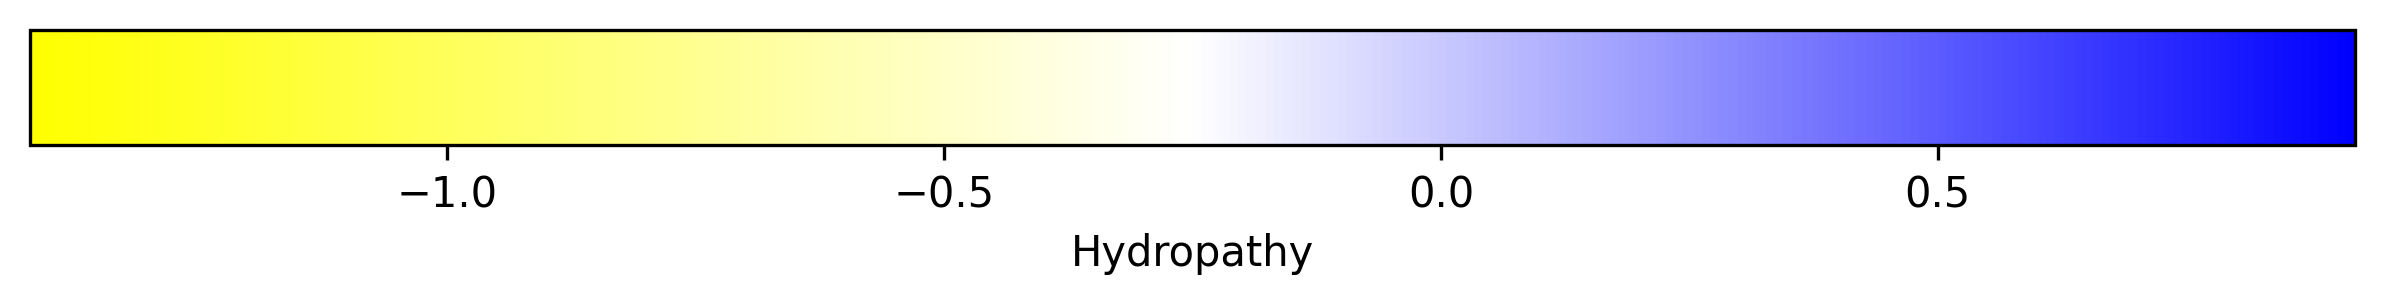

In [9]:
# Plot hydropathy scale
fig, ax = plt.subplots(figsize=(10, 0.5), dpi=300)
norm = mpl.colors.Normalize(vmin=results.scales.min(), vmax=results.scales.max())
cm = mpl.colors.LinearSegmentedColormap.from_list('hydropathy', colors=["#FFFF00", "#ffffff", "#0000FF"])
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=cm, norm=norm, orientation='horizontal')
cb1.set_label('Hydropathy')

# Occurrence analysis

In [10]:
# Create empty array
occurrence = None

for frame in frames:
    # Load atomic data
    atomic = pyKVFinder.read_pdb(os.path.join('./data', frame))
    
    # Get vertices from file
    vertices, atomic = pyKVFinder.get_vertices_from_file('./box.toml', atomic, probe_out=12.0)
    
    # Detect biomolecular cavities
    ncav, cavities = pyKVFinder.detect(atomic, vertices, probe_out=12.0, box_adjustment=True, volume_cutoff=50.0)
    
    if occurrence is None:
        occurrence = (cavities > 1).astype(int)
    else:
        occurrence += (cavities > 1).astype(int)

# Get percentage of occurence
percentage = (occurrence/len(frames)) * 100

# Get cavity points
cavities = ((occurrence > 0).astype('int32'))
cavities += cavities

# Export cavities with percentage of occurrence in B-factor column
pyKVFinder.export('./results/md/occurrence.pdb', cavities, None, vertices, B=percentage) 

In [11]:
# Visualize the occurrence (%) of cavity points throughout the simulation

# Create NGL Viewer widget
view = nglview.NGLWidget()

# Disply referece 6W02 as grey cartoon
pdb = view.add_component(reference)
pdb.clear()
pdb.add_cartoon(color='grey', opacity=0.5)

# Display ligand
lig = view.add_component(ligand)
lig.clear()
lig.add_licorice(color='red')

# Display surface points colored by hydrophobicity
cavs = view.add_component('./results/md/occurrence.pdb')
cavs.clear()
cavs.add_point(colorScheme='bfactor', colorScale='rainbow', colorReverse=True)

# Display on NGL viewer
view

NGLWidget()

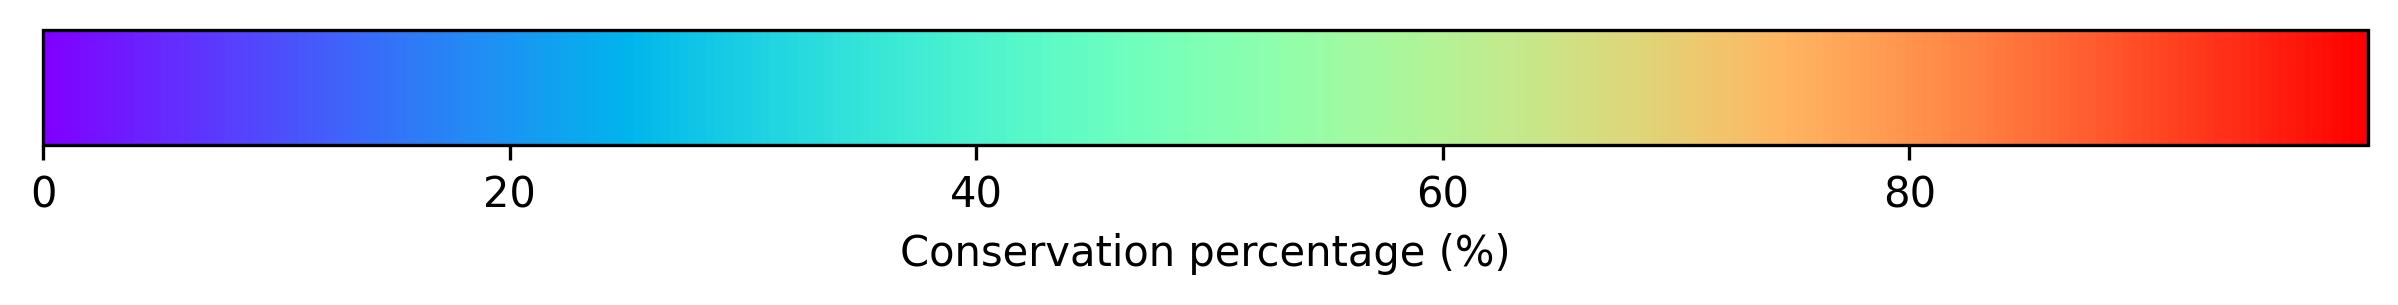

In [12]:
# Plot conservation pervcentage scale
fig, ax = plt.subplots(figsize=(10, 0.5), dpi=300)
norm = mpl.colors.Normalize(vmin= 0 / len(frames) * 100, vmax=occurrence.max() / len(frames) * 100)
cb1 = mpl.colorbar.ColorbarBase(ax, cmap=plt.get_cmap('rainbow'), norm=norm, orientation='horizontal')
cb1.set_label(r'Conservation percentage (%)')

# Properties throughout the simulation

In [13]:
# Calculating depth

# Depths
depth = numpy.zeros((2, len(frames)))

for frame in frames:
    # Get frame number
    num = (int(frame.replace('.pdb', '')))

    # Load atomic data
    atomic = pyKVFinder.read_pdb(os.path.join('./data', frame))

    # Get vertices from file
    vertices, atomic = pyKVFinder.get_vertices_from_file('./box.toml', atomic, probe_out=12.0)

    # Detect biomolecular cavities
    ncav, cavities = pyKVFinder.detect(atomic, vertices, probe_out=12.0, box_adjustment=True, volume_cutoff=50.0)

    # Depth characterization
    depths, max_depth, avg_depth = pyKVFinder.depth(cavities)

    # Accumulate
    depth[0, num-1] = max(max_depth.values())
    depth[1, num-1] = max(avg_depth.values())

    # Export cavity
    pyKVFinder.export(f'./results/md/depth/{num}.pdb', cavities, None, vertices, B=depths, model=num)

## Depth

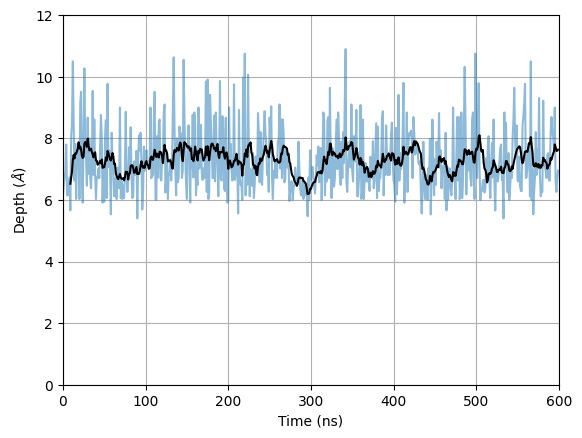

In [14]:
# Lineplot for depth characterization

# Prepare data
data = pd.DataFrame(depth, index=['Maximum', 'Average']).replace(0.0, numpy.nan).transpose()

# Plot data points
ax = data['Maximum'].plot.line(alpha=0.5)

# Plot moving average
data['moving_average'] = data.iloc[:, data.columns.get_loc('Maximum')].rolling(window=10).mean()
ax.plot('moving_average', data=data, color='black')

# Customize axis
ax.set_ylim(0, 12)
ax.set_xlim(0, 600)
ax.set_ylabel(r'Depth ($\AA$)')
ax.set_xlabel('Time (ns)')
ax.grid(True)

# Save to file
fig = ax.get_figure()
os.mkdir('./results/plots') if not os.path.exists('./results/plots') else None
fig.savefig('./results/plots/maximum_depth.png', dpi=300)

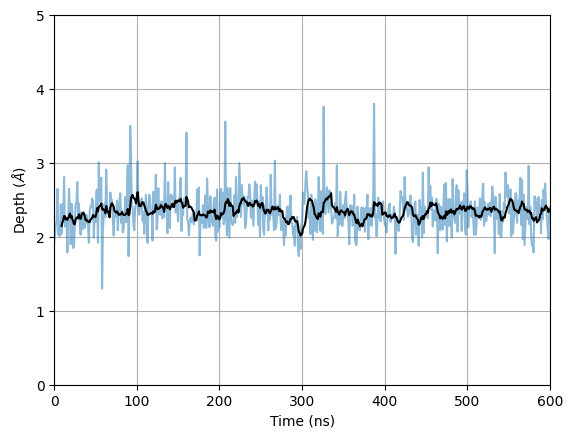

In [15]:
# Lineplot for depth characterization

# Prepare data
data = pd.DataFrame(depth, index=['Maximum', 'Average']).replace(0.0, numpy.nan).transpose()

# Plot data points
ax = data['Average'].plot.line(alpha=0.5)

# Plot moving average
data['moving_average'] = data.iloc[:, data.columns.get_loc('Average')].rolling(window=10).mean()
ax.plot('moving_average', data=data, color='black')

# Customize axis
ax.set_ylim(0, 5)
ax.set_xlim(0, 600)
ax.set_ylabel(r'Depth ($\AA$)')
ax.set_xlabel('Time (ns)')
ax.grid(True)

# Save to file
fig = ax.get_figure()
os.mkdir('./results/plots') if not os.path.exists('./results/plots') else None
fig.savefig('./results/plots/average_depth.png', dpi=300)

In [16]:
# Calculating volume, area and hydropathy

# Hydropathy
hydropathy = numpy.zeros((len(frames)))
volarea = numpy.zeros((2, len(frames)))

for frame in frames:
    # Get model number
    num = (int(frame.replace('.pdb', '')))

    # Load atomic data
    atomic = pyKVFinder.read_pdb(os.path.join('./data', frame))

    # Get vertices from file
    vertices, atomic = pyKVFinder.get_vertices_from_file('./box.toml', atomic, probe_out=12.0)

    # Detect biomolecular cavities
    ncav, cavities = pyKVFinder.detect(atomic, vertices, probe_out=12.0, box_adjustment=True, volume_cutoff=50.0)

    # Spatial characterization
    surface, volume, area = pyKVFinder.spatial(cavities)

    # Accumulate volume and area
    volarea[0, num-1] = max(volume.values())
    volarea[1, num-1] = max(area.values())
    
    # Hydropathy characterization
    scales, avg_hydropathy = pyKVFinder.hydropathy(surface, atomic, vertices, ignore_backbone=True)

    # Get index of larger cavity
    index = list(volume.values()).index(max(volume.values()))
    
    # Accumulate hydropathy
    avg_hydropathy.popitem()
    hydropathy[num-1] = list(avg_hydropathy.values())[index]

    # Export cavity
    pyKVFinder.export(f'./results/md/hydropathy/{num}.pdb', cavities, surface, vertices, Q=scales, model=num)

## Volume

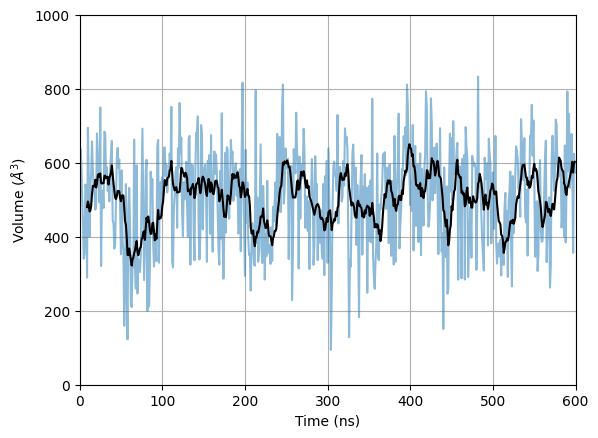

In [17]:
# Lineplot for volume characterization

# Prepare data
data = pd.DataFrame(volarea, index=['Volume', 'Area']).transpose().replace(0, numpy.nan)

# Plot data points
ax = data['Volume'].plot.line(alpha=0.5)

# Plot moving average
data['moving_average'] = data.iloc[:, data.columns.get_loc('Volume')].rolling(window=10).mean()
ax.plot('moving_average', data=data, color='black')

# # Customize axis
ax.set_ylim(0, 1000)
ax.set_xlim(0, 600)
ax.set_ylabel('Volume ($\AA^3$)')
ax.set_xlabel('Time (ns)')
ax.grid(True)

# Save to file
fig = ax.get_figure()
os.mkdir('./results/plots') if not os.path.exists('./results/plots') else None
fig.savefig('./results/plots/volume.png', dpi=300)

## Area

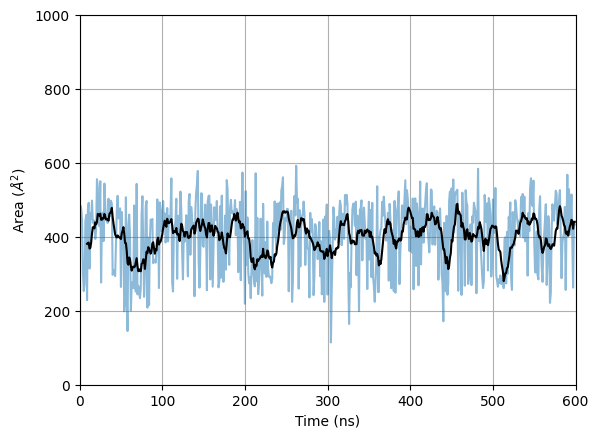

In [18]:
# Lineplot for volume characterization

# Prepare data
data = pd.DataFrame(volarea, index=['Volume', 'Area']).transpose().replace(0, numpy.nan)

# Plot data points
ax = data['Area'].plot.line(alpha=0.5)

# Plot moving average
data['moving_average'] = data.iloc[:, data.columns.get_loc('Area')].rolling(window=10).mean()
ax.plot('moving_average', data=data, color='black')

# # Customize axis
ax.set_ylim(0, 1000)
ax.set_xlim(0, 600)
ax.set_ylabel(r'Area ($\AA^2$)')
ax.set_xlabel('Time (ns)')
ax.grid(True)

# Save to file
fig = ax.get_figure()
os.mkdir('./results/plots') if not os.path.exists('./results/plots') else None
fig.savefig('./results/plots/volume.png', dpi=300)

## Hydropathy

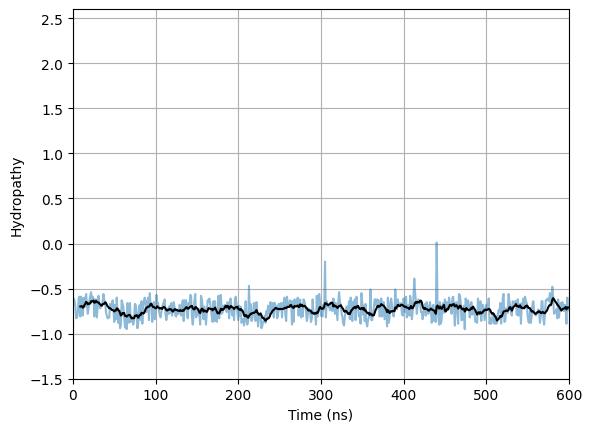

In [19]:
# Lineplot for hydropathy characterization

# Prepare data
data = pd.DataFrame(hydropathy, columns=['Average']).replace(0.0, numpy.nan)

# Plot data points
ax = data['Average'].plot.line(alpha=0.5)

# Plot moving average
data['moving_average'] = data.iloc[:, data.columns.get_loc('Average')].rolling(window=10).mean()
ax.plot('moving_average', data=data, color='black')

# Customize axis
ax.set_ylim(-1.5, 2.6)
ax.set_xlim(0, 600)
ax.set_xlabel('Time (ns)')
ax.set_ylabel('Hydropathy')
ax.grid(True)

# Save to file
fig = ax.get_figure()
os.mkdir('./results/plots') if not os.path.exists('./results/plots') else None
fig.savefig('./results/plots/hydropathy.png', dpi=300)